# **Clustering from Scratch**
##### a) K-Means
##### b) Nearest Neighbor
##### c) DBSCAN




In [584]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math

# **Dataset 1**

## Initialization of Points

In [585]:
points = [
    (2, 10),
    (2, 5),
    (8, 4),
    (5, 8),
    (7, 5),
    (6, 4),
    (1, 2),
    (4, 9)
]

In [586]:
def euclidean_distance(point1, point2):
  x1,y1=point1
  x2, y2= point2
  distance=math.sqrt((x2-x1)**2+(y2-y1)**2)
  return distance

In [587]:
euclidean_distance(points[0],points[2])

8.48528137423857

# **Dataset 2**

In [588]:
dataset2=pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
dataset2.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [589]:
print(dataset2.isna().any())
print(dataset2.isnull().any())

row.names    False
sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool
row.names    False
sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool


In [590]:
dataset2.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


# **Part A:** K-means

In [591]:
def kmeans(seeds, points):
  clusters={}
  for s in seeds:
    clusters[s]=[]

  for p in points:
    distances=[]
    for index, s in enumerate(seeds):
      distances.append(euclidean_distance(p,s))

    indexOfMinValue=distances.index(min(distances))
    clusters[seeds[indexOfMinValue]].append(p)

  print(clusters)
  return clusters




### **Q1.** The new clusters (i.e. the examples belonging to each cluster)

In [592]:
initial_clusters=kmeans([points[1],points[2],points[7]], points)

{(2, 5): [(2, 5), (1, 2)], (8, 4): [(8, 4), (7, 5), (6, 4)], (4, 9): [(2, 10), (5, 8), (4, 9)]}


In [593]:
def centralization(clusters):
  newSeeds=[]
  for seed in clusters:
    c=clusters[seed]
    length=len(c)
    newCentroid=np.sum(c,axis=0)/length
    newCentroid=tuple(np.round(newCentroid,2).tolist())
    newSeeds.append(newCentroid)
  return newSeeds

### **Q2.** The centers of the new clusters

In [594]:
newCenters=centralization(initial_clusters)
print(newCenters)

[(1.5, 3.5), (7.0, 4.33), (3.67, 9.0)]


### **Q3.** Plot a 10 by 10 space with all the 8 points and show the clusters after the first epoch and the new.

In [595]:
# Plot initial cluster assignments
def plotClusters(clusters, centers, title=""):
  plt.figure()

  for count, points in enumerate(clusters.values()):
      x_vals = [p[0] for p in points]
      y_vals = [p[1] for p in points]
      plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Cluster {count}")
  for count, center in enumerate(centers):
    plt.scatter(center[0], center[1], marker='x', s=100, color=f"C{count+1}",  label=f"New Center {count}")

  plt.title(f"{title} Clusters")
  plt.legend()
  plt.show()

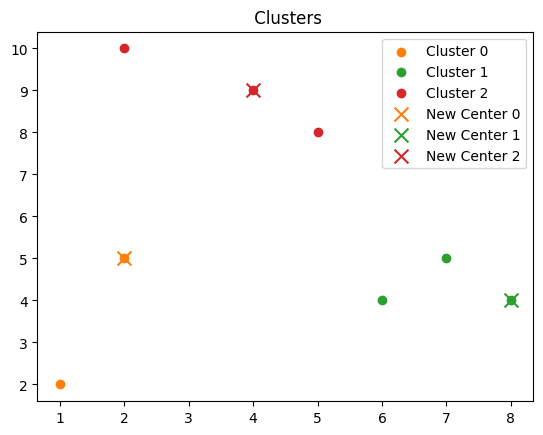

In [596]:
plotClusters(initial_clusters,[points[1],points[2],points[7]])

## Determining the max numbers of iterations before the model settles

### **Q4.** How many are more iterations needed to converge? Draw the result for each epoch.



In [597]:
def iterateKmeans( points,preUpdateCenters,preUpdateClusters):
  newClusters={}
  count=0
  while (True):
    newClusters=kmeans(preUpdateCenters, points)
    if newClusters==preUpdateClusters:
      break

    else:
      count+=1
      print(f"Update Number: {count}")
      preUpdateClusters=newClusters
      preUpdateCenters=centralization(newClusters)

    plotClusters(newClusters,preUpdateCenters)

  newCenters=preUpdateCenters
  return newCenters,newClusters

{(1.5, 3.5): [(2, 5), (1, 2)], (7.0, 4.33): [(8, 4), (7, 5), (6, 4)], (3.67, 9.0): [(2, 10), (5, 8), (4, 9)]}
Update Number: 1


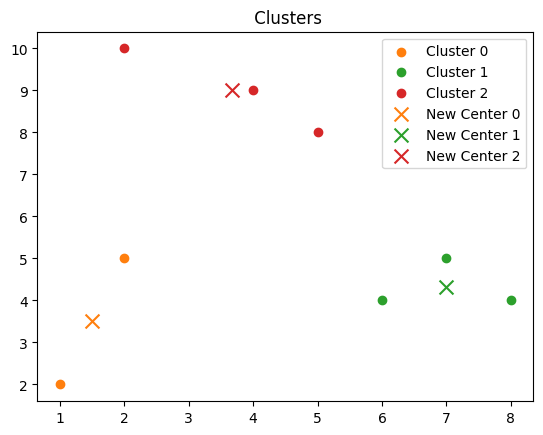

{(1.5, 3.5): [(2, 5), (1, 2)], (7.0, 4.33): [(8, 4), (7, 5), (6, 4)], (3.67, 9.0): [(2, 10), (5, 8), (4, 9)]}


In [598]:
finalCentersDS1, finalClustersDS1= iterateKmeans(points,newCenters,initial_clusters)

In [599]:
finalCentersDS1

[(1.5, 3.5), (7.0, 4.33), (3.67, 9.0)]

### **Q5.** Based on the answer for Q4, run that many epochs for convergence and present a final cluster plot.

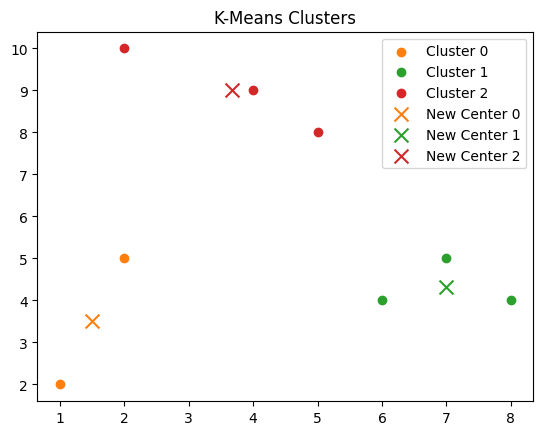

In [600]:
plotClusters(finalClustersDS1,finalCentersDS1,"K-Means")

# **Kmeans applied on Dataset2**

#### Data Visualization


### **Q7.** Plot ’sbp’ vs ’tobacco’ and represent the actual data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot.

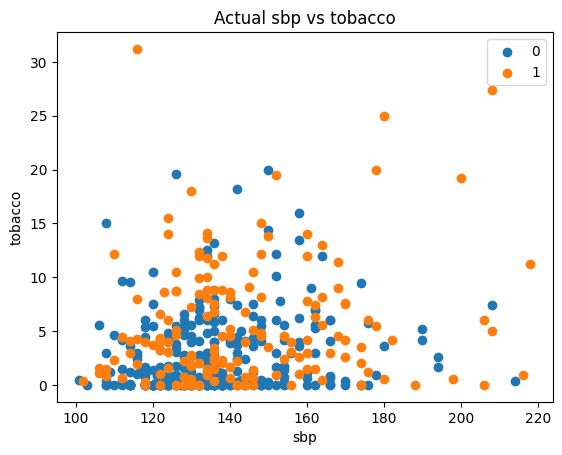

In [601]:
plt.figure()
class0=dataset2[dataset2['chd']==0]
class1=dataset2[dataset2['chd']==1]
plt.scatter(class0.iloc[:,1], class0.iloc[:,2], color="C0", label="0")
plt.scatter(class1.iloc[:,1], class1.iloc[:,2], color="C1", label="1")
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.title("Actual sbp vs tobacco")
plt.legend()
plt.show()

#### Preparing data in a tuple to fit into kmeans

In [602]:
list_of_tuples = list(zip(dataset2.iloc[:300,1], dataset2.iloc[:300,2]))
pointsDS2=list_of_tuples
pointsDS2[:5]

[(160, 12.0), (144, 0.01), (118, 0.08), (170, 7.5), (134, 13.6)]

In [603]:
list_of_tuples_test = list(zip(dataset2.iloc[300:,1], dataset2.iloc[300:,2]))
pointsDS2Test=list_of_tuples_test
pointsDS2Test[:5]

[(138, 0.0), (138, 2.27), (170, 0.0), (128, 0.0), (136, 1.2)]

In [604]:
KMclustersDS2=kmeans(pointsDS2Test[:2], pointsDS2Test)

{(138, 0.0): [(138, 0.0), (170, 0.0), (128, 0.0), (128, 0.0), (130, 0.05), (174, 0.0), (124, 0.0), (154, 0.0), (156, 0.0), (132, 0.0), (128, 0.0), (144, 0.4), (154, 0.31), (148, 0.0), (138, 0.87), (198, 0.52), (130, 0.08), (134, 0.9), (134, 0.0), (124, 0.4), (166, 0.6), (132, 0.72), (150, 0.0), (134, 0.12), (148, 0.5), (140, 0.0), (126, 0.0), (126, 0.96), (144, 0.0), (146, 0.0), (130, 0.54), (178, 0.95), (142, 0.0), (126, 0.0), (132, 0.0), (120, 0.0), (166, 0.8), (216, 0.92), (134, 1.1), (176, 0.0), (126, 0.0), (174, 0.0), (132, 0.0), (120, 0.0), (118, 0.0), (108, 0.0), (136, 0.0), (120, 0.0), (132, 0.0), (136, 0.0), (138, 0.0), (138, 0.06), (110, 0.0), (120, 0.0), (134, 0.57), (142, 0.0), (130, 0.0), (120, 0.0), (146, 0.64), (170, 0.4), (214, 0.4), (132, 0.0)], (138, 2.27): [(138, 2.27), (136, 1.2), (150, 14.4), (132, 8.4), (142, 2.4), (174, 3.5), (114, 9.6), (162, 1.5), (190, 5.15), (154, 1.4), (114, 1.2), (168, 11.4), (142, 3.72), (146, 4.36), (166, 6.0), (140, 8.6), (136, 1.7), (10

In [605]:
initialcentersDS2=centralization(KMclustersDS2)
initialcentersDS2

[(141.84, 0.21), (143.71, 5.7)]

{(141.84, 0.21): [(144, 0.01), (118, 0.08), (132, 6.2), (114, 4.08), (114, 0.0), (132, 0.0), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (106, 1.61), (150, 0.3), (138, 0.6), (124, 4.0), (118, 6.0), (146, 0.0), (136, 2.52), (122, 6.6), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (118, 0.28), (144, 0.04), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (142, 0.28), (138, 1.15), (140, 0.45), (130, 0.0), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (128, 0.0), (130, 0.56), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (143, 0.46), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (118, 0.0), (128, 0.42), (118, 1.5), (108, 1.5), (118, 1.0), (124, 0.0), (114, 0.0), (134, 2.0), (128, 0.0), (130, 0.0), (128,

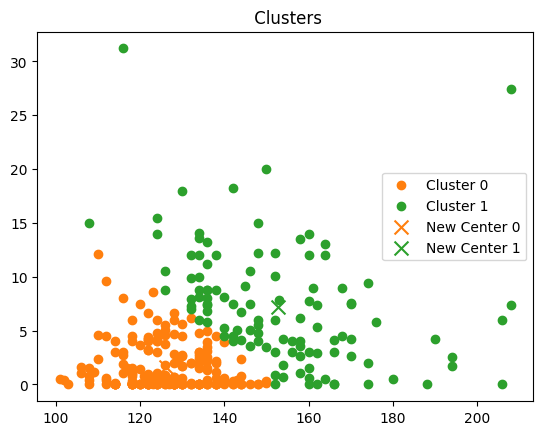

{(126.15, 1.63): [(118, 0.08), (134, 13.6), (132, 6.2), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0), (128, 0.42), (118, 1.5), (108, 1.5), (118, 1.0), (124, 0.0), (114, 0.0), (

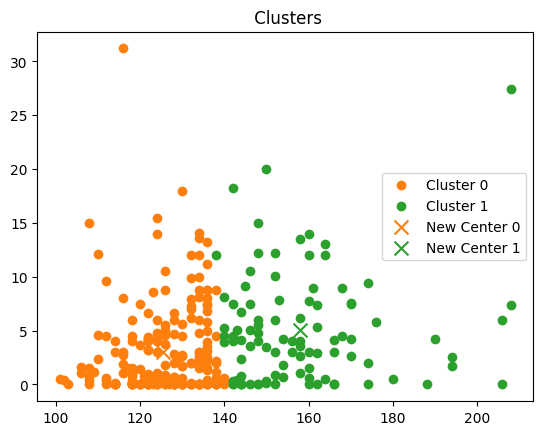

{(125.55, 3.02): [(118, 0.08), (134, 13.6), (132, 6.2), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (140, 8.14), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0), (128, 0.42), (118, 1.5), (108, 1.5), (118, 1.0), 

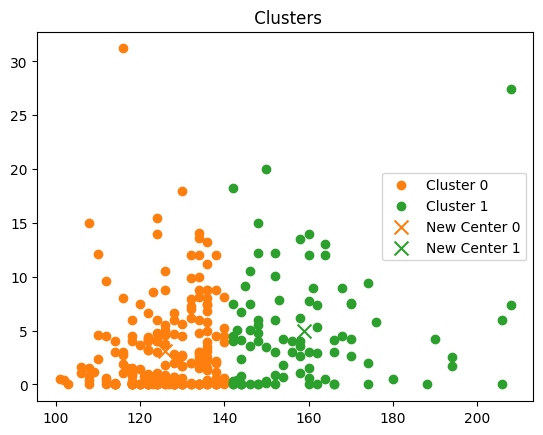

{(125.88, 3.11): [(118, 0.08), (134, 13.6), (132, 6.2), (142, 4.05), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (142, 0.28), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (140, 8.14), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0), (128, 0.42), (118, 1.5)

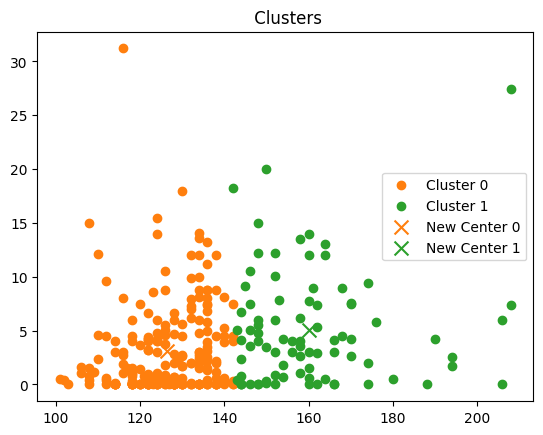

{(126.33, 3.1): [(118, 0.08), (134, 13.6), (132, 6.2), (142, 4.05), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (142, 18.2), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (142, 0.28), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (140, 8.14), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (143, 0.46), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0)

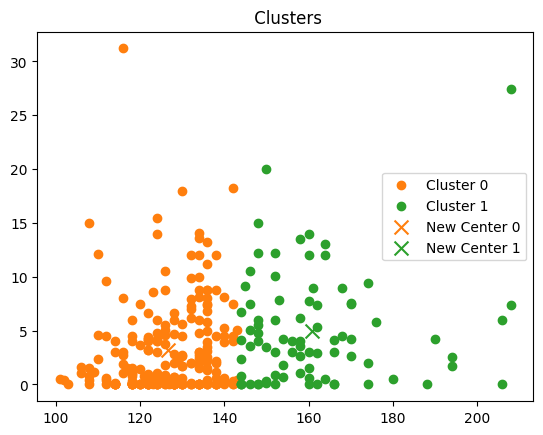

{(126.55, 3.16): [(118, 0.08), (134, 13.6), (132, 6.2), (142, 4.05), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (142, 18.2), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (142, 0.28), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (140, 8.14), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (143, 0.46), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0

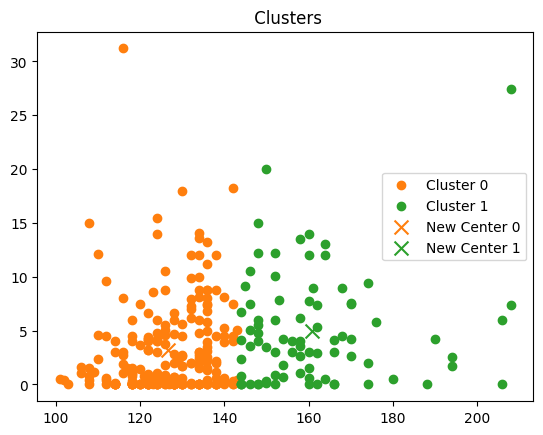

{(126.55, 3.16): [(118, 0.08), (134, 13.6), (132, 6.2), (142, 4.05), (114, 4.08), (114, 0.0), (132, 0.0), (134, 14.1), (118, 0.0), (132, 0.0), (112, 9.65), (117, 1.53), (120, 7.5), (124, 14.0), (106, 1.61), (132, 7.9), (138, 0.6), (142, 18.2), (124, 4.0), (118, 6.0), (136, 2.52), (122, 6.6), (126, 8.75), (122, 4.26), (140, 3.9), (110, 4.64), (130, 0.0), (136, 11.2), (118, 0.28), (120, 0.0), (130, 2.61), (114, 0.0), (128, 4.65), (116, 1.91), (114, 0.0), (126, 3.8), (122, 0.0), (134, 2.5), (134, 8.08), (118, 0.0), (126, 5.1), (103, 0.03), (121, 0.8), (142, 0.28), (138, 1.15), (140, 0.45), (130, 0.0), (136, 7.36), (124, 4.82), (112, 0.41), (118, 4.46), (122, 0.0), (118, 0.0), (130, 1.72), (130, 5.6), (126, 0.09), (128, 0.4), (136, 0.0), (134, 0.0), (140, 0.6), (108, 0.4), (114, 3.0), (140, 8.14), (128, 0.0), (130, 0.56), (126, 10.5), (140, 0.0), (126, 0.9), (122, 0.72), (116, 1.03), (120, 3.7), (143, 0.46), (118, 4.0), (134, 3.0), (138, 2.16), (136, 0.0), (122, 3.2), (136, 8.0), (118, 0.0

In [606]:
finalCentersDS2,finalClustersDS2=iterateKmeans(pointsDS2,initialcentersDS2,KMclustersDS2)

### **Q8.** Plot ’sbp’ vs ’tobacco’ and represent the predicted data points with different color to show the two classes. Hint: you may have to convert the labels from categorical to numeric values to plot.

In [607]:
finalCentersDS2

[(126.55, 3.16), (160.83, 4.99)]

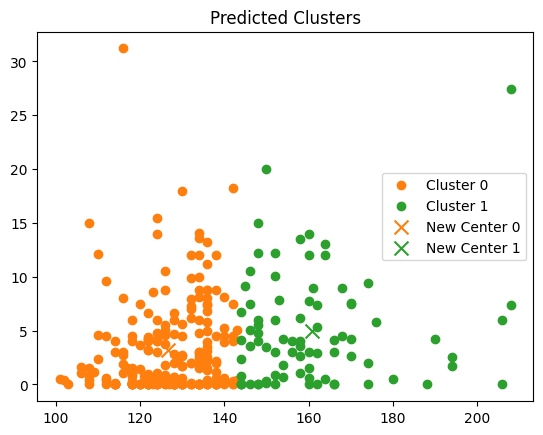

In [608]:
plotClusters(finalClustersDS2,finalCentersDS2,"Predicted")

In [609]:
dataset2_sorted_test=dataset2[300:].sort_values(by='sbp', ascending=True)
dataset2_train_sorted = dataset2[:300].sort_values(by='sbp', ascending=True)


### **Q6.** Provide accuracy.

In [610]:
df = dataset2.iloc[:300].copy()
df.reset_index(drop=True, inplace=True)
chdList = {}

for i, row in df.iterrows():
    sbp_val = row['sbp']
    tob_val = row['tobacco']
    chd_val = row['chd']
    pnt = (sbp_val, tob_val)

    if pnt not in chdList:
        chdList[pnt] = []
    chdList[pnt].append(chd_val)

In [611]:
count0List=[]
count1List=[]
for pointList in finalClustersDS2.values():
  chdCount=[]
  for point in pointList:
    if point in chdList:
      chdCount.extend(chdList[point])
  count0=chdCount.count(0)
  count1=chdCount.count(1)
  if count0>count1:
    count0List.extend(pointList)
  else:
    count1List.extend(pointList)


In [612]:
count0List

[(118, 0.08),
 (134, 13.6),
 (132, 6.2),
 (142, 4.05),
 (114, 4.08),
 (114, 0.0),
 (132, 0.0),
 (134, 14.1),
 (118, 0.0),
 (132, 0.0),
 (112, 9.65),
 (117, 1.53),
 (120, 7.5),
 (124, 14.0),
 (106, 1.61),
 (132, 7.9),
 (138, 0.6),
 (142, 18.2),
 (124, 4.0),
 (118, 6.0),
 (136, 2.52),
 (122, 6.6),
 (126, 8.75),
 (122, 4.26),
 (140, 3.9),
 (110, 4.64),
 (130, 0.0),
 (136, 11.2),
 (118, 0.28),
 (120, 0.0),
 (130, 2.61),
 (114, 0.0),
 (128, 4.65),
 (116, 1.91),
 (114, 0.0),
 (126, 3.8),
 (122, 0.0),
 (134, 2.5),
 (134, 8.08),
 (118, 0.0),
 (126, 5.1),
 (103, 0.03),
 (121, 0.8),
 (142, 0.28),
 (138, 1.15),
 (140, 0.45),
 (130, 0.0),
 (136, 7.36),
 (124, 4.82),
 (112, 0.41),
 (118, 4.46),
 (122, 0.0),
 (118, 0.0),
 (130, 1.72),
 (130, 5.6),
 (126, 0.09),
 (128, 0.4),
 (136, 0.0),
 (134, 0.0),
 (140, 0.6),
 (108, 0.4),
 (114, 3.0),
 (140, 8.14),
 (128, 0.0),
 (130, 0.56),
 (126, 10.5),
 (140, 0.0),
 (126, 0.9),
 (122, 0.72),
 (116, 1.03),
 (120, 3.7),
 (143, 0.46),
 (118, 4.0),
 (134, 3.0),
 (

In [613]:
x_values = []
y_values = []
predicted = []

for pnt in count0List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([0] * len(count0List))

for pnt in count1List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([1] * len(count1List))

df = pd.DataFrame({
    'sbp': x_values,
    'tobacco': y_values,
    'predicted': predicted
})
df.head()

,sbp,tobacco,predicted
0,118,0.08,0
1,134,13.60,0
2,132,6.20,0
3,142,4.05,0
4,114,4.08,0


In [614]:
df_sorted_KM = df.sort_values(by='sbp', ascending=True)
df_sorted_KM.head()

,sbp,tobacco,predicted
213,101,0.48,0
142,102,0.40,0
41,103,0.03,0
205,106,1.08,0
14,106,1.61,0


In [615]:
accuracy_score(dataset2_train_sorted['chd'], df_sorted_KM['predicted'])

0.6333333333333333

# Nearest Neighbor with Dataset 1

In [616]:
threshold=4
def nearest_neighbors(points, start_point):
  neighbors = []
  for point in points:
    distance=euclidean_distance(point, start_point)
    if distance <= threshold:
      neighbors.append(point)
  return neighbors



In [617]:
start_point = points[0]  # Find neighbors for the first point
neighbors = nearest_neighbors(points, start_point)
print(f"Nearest neighbors to {start_point} are: {neighbors}")

Nearest neighbors to (2, 10) are: [(2, 10), (5, 8), (4, 9)]


In [618]:
def NN_cluster(points):
  NNcluster={}
  for index, point in enumerate(points):
    check=False
    for i in range(len(NNcluster)):
      if i in NNcluster:
        if point in NNcluster[i]:
          check=True
          break
    if not check:
      NNcluster[index]=nearest_neighbors(points, point)

  return NNcluster


In [619]:
finalNNcluster=NN_cluster(points)
finalNNcluster

{0: [(2, 10), (5, 8), (4, 9)],
 1: [(2, 5), (1, 2)],
 2: [(8, 4), (7, 5), (6, 4)]}

### **Q9.** Have you got the same results as you got using K-Means?
Yes, the final clusters of the two algorithms match.

### **Q10.** Give the final plot for NN clustering

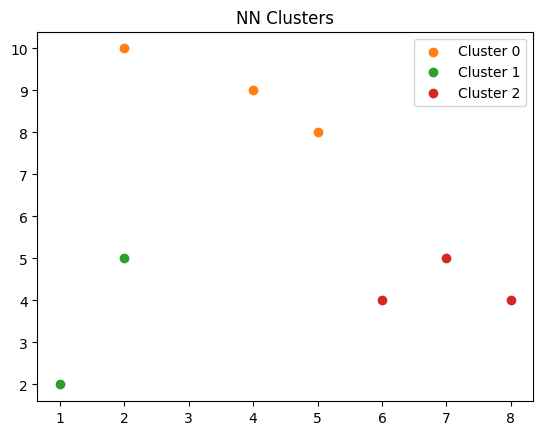

In [620]:
plt.figure()

for count,  points in enumerate(finalNNcluster.values()):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Cluster {count}")

plt.title("NN Clusters")
plt.legend()
plt.show()

### **Q11.** Compare the performance of K-means and nearest neighbour clustering algorithms. Provide disadvantages of the algorithms on bigger datasets.

K-means clustering groups data by assigning points to clusters around specified seeds (centroids) and update their value per k-means iteration to adjust the clusters optimally. Working among several seeds make the algorithm fast and scalable for large datasets. However, its disadvantage is that the centroids must be picked carefully to optimize the final results as the choice of the seeds matter. On the other hand, nearest neighbour clustering builds clusters by linking the closest points together. NN Clustering does not rely on the choice of a centroid and can be picked at random allowing for flexibility. The downside is that it requires calculating distances between every pair of points and storing a huge distance matrix, making it slow and memory-intensive for big datasets.

# Nearest Neighbor with Dataset 2

In [621]:
finalNNclusterDS2=NN_cluster(pointsDS2)


In [622]:
df = dataset2.iloc[:300].copy()
df.reset_index(drop=True, inplace=True)
chdList = {}

for i, row in df.iterrows():
    sbp_val = row['sbp']
    tob_val = row['tobacco']
    chd_val = row['chd']
    pnt = (sbp_val, tob_val)

    if pnt not in chdList:
        chdList[pnt] = []
    chdList[pnt].append(chd_val)

In [623]:
count0List=[]
count1List=[]
for pointList in finalNNclusterDS2.values():
  chdCount=[]
  for point in pointList:
    if point in chdList:
      chdCount.extend(chdList[point])
  count0=chdCount.count(0)
  count1=chdCount.count(1)
  if count0>count1:
    count0List.extend(pointList)
  else:
    count1List.extend(pointList)


In [624]:
count0List

[(160, 12.0),
 (164, 12.0),
 (158, 13.5),
 (160, 14.0),
 (161, 9.0),
 (118, 0.08),
 (118, 0.0),
 (117, 1.53),
 (118, 0.28),
 (120, 0.0),
 (116, 1.91),
 (118, 0.0),
 (121, 0.8),
 (118, 0.0),
 (116, 1.03),
 (118, 4.0),
 (118, 0.0),
 (118, 1.5),
 (118, 1.0),
 (120, 1.4),
 (120, 0.0),
 (116, 2.7),
 (120, 0.0),
 (118, 1.05),
 (118, 0.75),
 (120, 0.0),
 (116, 3.0),
 (118, 0.0),
 (118, 0.12),
 (118, 0.12),
 (118, 0.12),
 (132, 6.2),
 (132, 7.9),
 (134, 8.08),
 (130, 5.6),
 (134, 3.0),
 (134, 8.8),
 (134, 6.0),
 (130, 2.78),
 (130, 4.5),
 (132, 7.0),
 (134, 4.8),
 (134, 2.75),
 (132, 7.28),
 (132, 9.9),
 (134, 3.0),
 (142, 4.05),
 (144, 4.09),
 (140, 3.9),
 (142, 0.28),
 (140, 0.6),
 (143, 0.46),
 (140, 4.5),
 (142, 7.44),
 (144, 6.75),
 (144, 2.4),
 (143, 5.04),
 (140, 5.2),
 (144, 0.76),
 (142, 4.48),
 (114, 4.08),
 (117, 1.53),
 (116, 1.91),
 (114, 3.0),
 (116, 1.03),
 (116, 2.7),
 (116, 3.0),
 (112, 4.46),
 (114, 0.1),
 (114, 0.0),
 (118, 0.0),
 (117, 1.53),
 (114, 0.0),
 (116, 1.91),
 (11

In [625]:
x_values = []
y_values = []
predicted = []

for pnt in count0List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([0] * len(count0List))

for pnt in count1List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([1] * len(count1List))

df = pd.DataFrame({
    'sbp': x_values,
    'tobacco': y_values,
    'predicted': predicted
})
df.head()

,sbp,tobacco,predicted
0,160,12.0,0
1,164,12.0,0
2,158,13.5,0
3,160,14.0,0
4,161,9.0,0


In [626]:
df_sorted_NN = df.sort_values(by='sbp', ascending=True)
df_sorted_NN.head()

,sbp,tobacco,predicted
679,101,0.48,0
714,101,0.48,0
713,102,0.40,0
678,102,0.40,0
712,103,0.03,0


In [627]:
accuracy_score(dataset2_train_sorted['chd'], df_sorted_NN['predicted'][:300])

0.5866666666666667

# DBSCAN with Dataset 1

In [628]:
def dbscan(points, eps, min_points):
    labels = [None] * len(points)
    cluster_id = 0

    for i in range(len(points)):
        if labels[i] is not None:
            continue

        neighbors = []
        for index, point in enumerate(points):
          if euclidean_distance(points[i], point) <= eps:
            neighbors.append(index)

        if len(neighbors) < min_points:
            labels[i] = -1

        else:
            cluster_id += 1
            labels[i] = cluster_id
            queue = list(neighbors)
            neighbor_neighbors=[]

            while queue:
                neighbor_index = queue.pop()
                if labels[neighbor_index] is None:
                    labels[neighbor_index] = cluster_id

                    for index, point in enumerate(points):
                      if euclidean_distance(points[neighbor_index], point) <= eps:
                        neighbor_neighbors.append(index)

                    if len(neighbor_neighbors) >= min_points:
                        queue.extend(neighbor_neighbors)

                elif labels[neighbor_index] == -1:
                    labels[neighbor_index] = cluster_id
    return labels

###Applying DBSCAN with eps=2

In [629]:
points = [
    (2, 10),
    (2, 5),
    (8, 4),
    (5, 8),
    (7, 5),
    (6, 4),
    (1, 2),
    (4, 9)
]

In [630]:
clusterID=dbscan(points, 2, 2)
clusterID

[-1, -1, 1, 2, 1, 1, -1, 2]

In [631]:
listOfClusters=set(clusterID)
listOfClusters

{-1, 1, 2}

In [632]:
dbclusters={}
for cluster in listOfClusters:
  dbclusters[cluster]=[]
for index, cluster in enumerate(clusterID):
  dbclusters[cluster].append(points[index])
dbclusters


{1: [(8, 4), (7, 5), (6, 4)],
 2: [(5, 8), (4, 9)],
 -1: [(2, 10), (2, 5), (1, 2)]}

### **Q13.** Provide the final cluster plot.

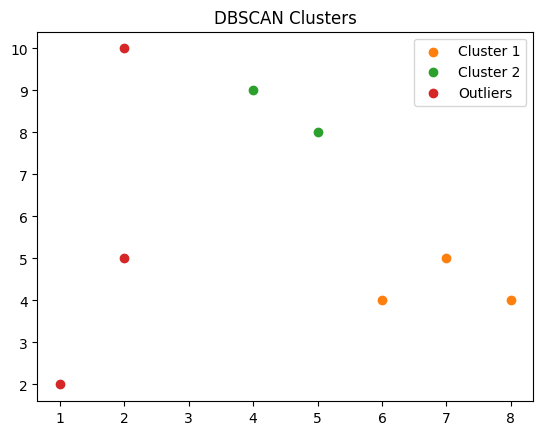

In [633]:
plt.figure()

for count, (clusterNumber, points) in enumerate(dbclusters.items()):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    if clusterNumber==-1:
      plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Outliers")
    else:
      plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Cluster {clusterNumber}")

plt.title("DBSCAN Clusters")
plt.legend()
plt.show()

In [634]:
points

[(2, 10), (2, 5), (1, 2)]

### Applying DBSCAN with eps=sqrt(2)

### **Q14.** Perform the DBScan for eps =√10 and provide the cluster plot.


In [635]:
points = [
    (2, 10),
    (2, 5),
    (8, 4),
    (5, 8),
    (7, 5),
    (6, 4),
    (1, 2),
    (4, 9)
]

In [636]:
clusterID2=dbscan(points, math.sqrt(10), 2)
clusterID2



[1, 2, 3, 1, 3, 3, 2, 1]

In [637]:
listOfClusters2=set(clusterID2)
listOfClusters2

{1, 2, 3}

In [638]:
dbclusters2={}
for cluster in listOfClusters2:
  dbclusters2[cluster]=[]
for index, cluster in enumerate(clusterID2):
  dbclusters2[cluster].append(points[index])
dbclusters2


{1: [(2, 10), (5, 8), (4, 9)],
 2: [(2, 5), (1, 2)],
 3: [(8, 4), (7, 5), (6, 4)]}

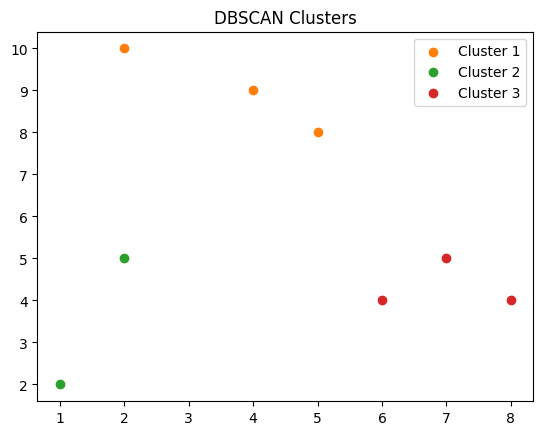

In [639]:
plt.figure()

for count, (clusterNumber, points) in enumerate(dbclusters2.items()):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    if clusterNumber==-1:
      plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Outliers")
    else:
      plt.scatter(x_vals, y_vals, color=f"C{count+1}", label=f"Cluster {clusterNumber}")

plt.title("DBSCAN Clusters")
plt.legend()
plt.show()

## DBSCAN - Dataset2

In [640]:
clusterID_DS2=dbscan(pointsDS2, math.sqrt(10), 2)
clusterID_DS2



[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 8,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,

In [641]:
listOfClustersDS2=set(clusterID_DS2)
listOfClustersDS2

{-1, 1, 2, 3, 4, 5, 6, 7, 8}

In [642]:
dbclustersDS2={}
for cluster in listOfClustersDS2:
  dbclustersDS2[cluster]=[]
for index, cluster in enumerate(clusterID_DS2):
  dbclustersDS2[cluster].append(pointsDS2[index])
dbclustersDS2


{1: [(160, 12.0),
  (144, 0.01),
  (118, 0.08),
  (134, 13.6),
  (132, 6.2),
  (142, 4.05),
  (114, 4.08),
  (114, 0.0),
  (132, 0.0),
  (134, 14.1),
  (118, 0.0),
  (132, 0.0),
  (117, 1.53),
  (120, 7.5),
  (146, 10.5),
  (158, 2.6),
  (106, 1.61),
  (132, 7.9),
  (150, 0.3),
  (138, 0.6),
  (124, 4.0),
  (118, 6.0),
  (145, 9.1),
  (144, 4.09),
  (146, 0.0),
  (136, 2.52),
  (158, 1.02),
  (122, 6.6),
  (126, 8.75),
  (148, 5.5),
  (122, 4.26),
  (140, 3.9),
  (110, 4.64),
  (130, 0.0),
  (136, 11.2),
  (118, 0.28),
  (144, 0.04),
  (120, 0.0),
  (130, 2.61),
  (114, 0.0),
  (128, 4.65),
  (162, 7.4),
  (116, 1.91),
  (114, 0.0),
  (126, 3.8),
  (122, 0.0),
  (134, 2.5),
  (152, 0.9),
  (134, 8.08),
  (156, 3.0),
  (152, 5.99),
  (118, 0.0),
  (126, 5.1),
  (121, 0.8),
  (142, 0.28),
  (138, 1.15),
  (152, 10.1),
  (140, 0.45),
  (130, 0.0),
  (136, 7.36),
  (124, 4.82),
  (112, 0.41),
  (118, 4.46),
  (122, 0.0),
  (118, 0.0),
  (130, 1.72),
  (130, 5.6),
  (126, 0.09),
  (128, 0.4

In [643]:
df = dataset2.iloc[:300].copy()
df.reset_index(drop=True, inplace=True)
chdList = {}

for i, row in df.iterrows():
    sbp_val = row['sbp']
    tob_val = row['tobacco']
    chd_val = row['chd']
    pnt = (sbp_val, tob_val)

    if pnt not in chdList:
        chdList[pnt] = []
    chdList[pnt].append(chd_val)

In [644]:
count0List=[]
count1List=[]
for pointList in dbclustersDS2.values():
  chdCount=[]
  for point in pointList:
    if point in chdList:
      chdCount.extend(chdList[point])
  count0=chdCount.count(0)
  count1=chdCount.count(1)
  if count0>count1:
    count0List.extend(pointList)
  else:
    count1List.extend(pointList)


In [645]:
count0List

[(160, 12.0),
 (144, 0.01),
 (118, 0.08),
 (134, 13.6),
 (132, 6.2),
 (142, 4.05),
 (114, 4.08),
 (114, 0.0),
 (132, 0.0),
 (134, 14.1),
 (118, 0.0),
 (132, 0.0),
 (117, 1.53),
 (120, 7.5),
 (146, 10.5),
 (158, 2.6),
 (106, 1.61),
 (132, 7.9),
 (150, 0.3),
 (138, 0.6),
 (124, 4.0),
 (118, 6.0),
 (145, 9.1),
 (144, 4.09),
 (146, 0.0),
 (136, 2.52),
 (158, 1.02),
 (122, 6.6),
 (126, 8.75),
 (148, 5.5),
 (122, 4.26),
 (140, 3.9),
 (110, 4.64),
 (130, 0.0),
 (136, 11.2),
 (118, 0.28),
 (144, 0.04),
 (120, 0.0),
 (130, 2.61),
 (114, 0.0),
 (128, 4.65),
 (162, 7.4),
 (116, 1.91),
 (114, 0.0),
 (126, 3.8),
 (122, 0.0),
 (134, 2.5),
 (152, 0.9),
 (134, 8.08),
 (156, 3.0),
 (152, 5.99),
 (118, 0.0),
 (126, 5.1),
 (121, 0.8),
 (142, 0.28),
 (138, 1.15),
 (152, 10.1),
 (140, 0.45),
 (130, 0.0),
 (136, 7.36),
 (124, 4.82),
 (112, 0.41),
 (118, 4.46),
 (122, 0.0),
 (118, 0.0),
 (130, 1.72),
 (130, 5.6),
 (126, 0.09),
 (128, 0.4),
 (136, 0.0),
 (134, 0.0),
 (140, 0.6),
 (168, 4.5),
 (108, 0.4),
 (11

In [646]:
x_values = []
y_values = []
predicted = []

for pnt in count0List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([0] * len(count0List))

for pnt in count1List:
    # Extend the totals rather than reassigning on each iteration
    x_values.append(pnt[0])
    y_values.append(pnt[1])

predicted.extend([1] * len(count1List))

df = pd.DataFrame({
    'sbp': x_values,
    'tobacco': y_values,
    'predicted': predicted
})
df.head()

,sbp,tobacco,predicted
0,160,12.00,0
1,144,0.01,0
2,118,0.08,0
3,134,13.60,0
4,132,6.20,0


In [647]:
df_sorted_DBSCAN = df.sort_values(by='sbp', ascending=True)
df_sorted_DBSCAN.head()

,sbp,tobacco,predicted
272,101,0.48,0
271,102,0.40,0
270,103,0.03,0
252,106,1.08,0
16,106,1.61,0


In [648]:
accuracy_score(dataset2_train_sorted['chd'], df_sorted_DBSCAN['predicted'])

0.6366666666666667

Comparing all 3 accuracies of models:

* K-Means:0.6333333333333333

* Nearest Neighbor:0.5866666666666667
* DBSCAN:0.6366666666666667

---
It is evident that DBSCAN stands as the most accurate model of the 3 clustering algorithms.


# **Part D** - Sklearn

## k-means

In [649]:
from sklearn.cluster import KMeans

In [650]:
points = [
    (2, 10),
    (2, 5),
    (8, 4),
    (5, 8),
    (7, 5),
    (6, 4),
    (1, 2),
    (4, 9)
]

#### Dataset 1

In [651]:
kmeansDS1 = KMeans(n_clusters=3,init=[points[1],points[2],points[7]], n_init=1,  random_state=42)
# Fit the model
kmeansDS1.fit(points)

# Output the cluster centers
print("Cluster Centers:")
print(kmeansDS1.cluster_centers_)


Cluster Centers:
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


The generated final centers ([(1.5, 3.5), (7.0, 4.33), (3.67, 9.0)]) and the sklearn results for kmeans algorithm are identical ensuring a successful execution

#### Dataset2

In [652]:
kmeansDS2 = KMeans(n_clusters=2, random_state=42)
# Fit the model
kmeansDS2.fit(pointsDS2)

# Output the cluster centers
print("Cluster Centers:")
print(kmeansDS2.cluster_centers_)


Cluster Centers:
[[127.09292035   3.12769912]
 [162.41891892   5.27621622]]


### Comparison
The final generated result ([(126.55, 3.16), (160.83, 4.99)]) and the sklearn results for kmeans algorithm are almost identical ensuring a successful execution

## Nearest Neighbor

In [653]:
from sklearn.neighbors import NearestNeighbors

train_df = dataset2.iloc[:300].reset_index(drop=True)
test_df  = dataset2.iloc[300:].reset_index(drop=True)

X_train = train_df[['sbp', 'tobacco']].values
y_train = train_df['chd']

X_test  = test_df[['sbp', 'tobacco']].values
y_test  = test_df['chd']

# Fit nearest neighbors on X_train
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')
nn.fit(X_train)

# Predict on X_test
distances, indices = nn.kneighbors(X_test)

correct_count = 0
for i, inds in enumerate(indices):
    # Now y_train has an index [0..299], so y_train[inds] works
    neighbor_labels = y_train[inds]
    if y_test.iloc[i] in neighbor_labels.values:
        correct_count += 1

accuracy = correct_count / len(X_test)
print("Accuracy-like metric:", accuracy)





Accuracy-like metric: 0.8024691358024691


**Comparison**

The model generated a high accuracy measure in comparison to the experimental value (0.58666667) this states that more room for improvement in adjusting the parameters and the implementation can be provided and handled well. The overall implementation captures the findings of the nn clustering algorithm ensuring right implementation.

## DBSCAN

In [654]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(pointsDS2)
print(dbscan.labels_)

[ 0  1  1  2  1  3  1  1  4  1 -1  1  1  1 -1  1 -1  5  6  7  8  3  9  1
 -1  1 10  5  1  1  1  6 -1 11 12  1 13 -1  1 14  1  1  1  1  4  1 15  1
  4  1  1  1 16  1  6 -1  1  1 17  1  1  1 -1  1  1  1  1  4 10  1  1  1
  1  1  1  1  1  1 -1 18  1 -1 12 -1  1  1 11  1  1  1  1 -1  1 10 19  1
  1  1  1 20  1 21  1  1  1  6 18  2  1  1  4 -1  1 -1 -1  1 13 22 -1  1
  1  1  1 13 -1 -1 12  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  0  1  1  1
 18  1  1  1  1  7 12  1  1 18  1  1  1 -1  1  1  1 -1  1  1  1  3 -1 23
  1 -1 19  1  1 23  1  1  1  1  1 -1 21 16 24  6 -1  1 -1  1  1  1  1  1
 17  1  1  1  1 -1 23  1  1  1  1  1  1 -1 23  1  1  1  1  1  1  1  1 15
 -1  1  4 -1  1 -1  1  1  3  1 -1  1  1 -1 18 14  1  1  1 -1  1 -1  1  1
 13  1 -1  1  1  1  1  6 23  1 -1  1 25  5 15 20 26  1 -1 22  1  1  1  1
  3  1  1  1  4  1  1  1  1 -1 18  1 -1  1  4  1  8 26 -1  1 -1  1  1  1
  1  4  4 17  9 24  1  1  1  1  1 25]


**Comparison**
by comparing the sklearn result with the generated result for the labels : [1,1,1,2,1,1,1,1,1,1,3,1,1,1,-1,1,1,1,1,4,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,7,1,1,1,1,1,1,1,2,1,1,1,2,1,8,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,-1,1,1,1,-1,1,1,1,1,-1,1,1,1,6,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,3,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,8,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,5,1,1,1,1,1,1,1,1] one can tell that both models generalized the overall classification to cluster 1 making the main functionality similar ensuring successful implementation.

# **Questions**

#### **1) What are the different metrics used to evaluate the performance of different clustering algorithms?**






Metrics such as Silhouette Score, Davies-Bouldin Index, and Adjusted Rand Index (ARI) serve as good performance evaluation metrics to analyze and assess the clusters. They are used to measure various characteristics and behaviour of the clusters ones which include assessing cluster separation, compactness, and similarity between predicted and true clusters.

#### **2) Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?**

Besides using accuracy, there are several ways to evaluate performance. For instance some of the previously mentioned methods such as ARI, can give a measure of how closely the generated clusters match the real labels without relying on simple classification accuracy. Alternatively, the Silhouette Score allows to analyze how well an algorithm create clear and well separated clusters based solely on the data, without using any labels.